# <center><b><font color="red">Hypothesis Testing in Python</font></b></center>

![HT](https://th.bing.com/th/id/R.67ed341078f274221efef2207cdac23b?rik=9ONkeAdroUNs7A&riu=http%3a%2f%2fwww.processexam.com%2ffiles%2fprocessexam%2fdownload%2fsix-sigma-hypothesis.jpg&ehk=7Apm%2fRg5Qal8c9lwzxcBaCtCEIMW0IP%2b2oR%2fOI55Jm0%3d&risl=&pid=ImgRaw&r=0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone "https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git" -q

In [3]:
url_demo_votes = "/content/CAREER-TRACK-Data-Scientist-with-Python/22_Hypothesis_Testing_in_Python/_dataset/dem_votes_potus_12_16.feather"
url_repubs_votes = "/content/CAREER-TRACK-Data-Scientist-with-Python/22_Hypothesis_Testing_in_Python/_dataset/repub_votes_potus_08_12.feather"
url_shipments = "/content/CAREER-TRACK-Data-Scientist-with-Python/22_Hypothesis_Testing_in_Python/_dataset/late_shipments.feather"
url_stack_overflow = "/content/CAREER-TRACK-Data-Scientist-with-Python/22_Hypothesis_Testing_in_Python/_dataset/stack_overflow.feather"

In [4]:
late_shipments = pd.read_feather(url_shipments)
stack_overflow = pd.read_feather(url_stack_overflow)
repubs_votes = pd.read_feather(url_repubs_votes)
sample_dem_data = pd.read_feather(url_demo_votes)

In [5]:
late_shipments.columns

Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

In [6]:
stack_overflow.columns

Index(['respondent', 'main_branch', 'hobbyist', 'age', 'age_1st_code',
       'age_first_code_cut', 'comp_freq', 'comp_total', 'converted_comp',
       'country', 'currency_desc', 'currency_symbol',
       'database_desire_next_year', 'database_worked_with', 'dev_type',
       'ed_level', 'employment', 'ethnicity', 'gender', 'job_factors',
       'job_sat', 'job_seek', 'language_desire_next_year',
       'language_worked_with', 'misc_tech_desire_next_year',
       'misc_tech_worked_with', 'new_collab_tools_desire_next_year',
       'new_collab_tools_worked_with', 'new_dev_ops', 'new_dev_ops_impt',
       'new_ed_impt', 'new_job_hunt', 'new_job_hunt_research', 'new_learn',
       'new_off_topic', 'new_onboard_good', 'new_other_comms', 'new_overtime',
       'new_purchase_research', 'purple_link', 'newso_sites', 'new_stuck',
       'op_sys', 'org_size', 'platform_desire_next_year',
       'platform_worked_with', 'purchase_what', 'sexuality', 'so_account',
       'so_comm', 'so_part_freq'

In [7]:
repubs_votes.columns

Index(['state', 'county', 'repub_percent_08', 'repub_percent_12'], dtype='object')

In [8]:
sample_dem_data.columns

Index(['state', 'county', 'dem_percent_12', 'dem_percent_16'], dtype='object')

|            | Parametric Test                           | Nonparametric Test                       |
|------------|-------------------------------------------|------------------------------------------|
| Assumption | Assumes specific population distribution   | Makes no assumption about population distribution |
| Data Type  | Requires interval or ratio data            | Can handle nominal, ordinal, interval, and ratio data |
| Sample Size | More powerful with large sample sizes      | Can be effective with small sample sizes  |
| Test Statistic | Based on population parameters (e.g., mean, variance) | Based on ranks, differences, or frequencies |
| Examples   | t-test, ANOVA, regression analysis         | Mann-Whitney U test, Wilcoxon signed-rank test, Chi-square test |


Here's a brief explanation of each aspect:

- `Assumption`:
    - `Parametric tests` **it make assumptions** that the data is sampled from a specific population distribution (e.g., `normal distribution`).
    - `Nonparametric tests`, on the other hand, **do not make any assumptions** about the population distribution.

- `Data Type`:
    - `Parametric tests` require `interval` or `ratio data`, which have specific measurement scales.It means that these tests are designed to work with data that has a specific measurement scale.
        - **Interval scale** data represents values that have a consistentunit of measurement and meaningful differences between the values.Examples include temperature measured in Celsius or Fahrenheit,where the difference between 20°C and 30°C is the same as thedifference between 30°C and 40°C.
        - **Ratio scale data**, in addition to having a consistent unit ofmeasurement and meaningful differences, also has a true zero point.This means that a value of zero represents the absence of themeasured attribute. Examples of ratio scale data include weight,height, and time. A weight of 0 kg means no weight at all.
    - `Nonparametric tests` can handle a wider range of data types, including `nominal`, `ordinal`, `interval`, and `ratio data`.
        - `Nominal data`: Categorical data without any inherent order or numerical value.
        - `Ordinal data`: Categorical data with a specific order or ranking.
        - `Interval data`: Numerical data with consistent intervals, but without a true zero point.
        - `Ratio data`: Numerical data with consistent intervals and a true zero point.

- `Sample Size`:
    - `Parametric tests` tend to be more powerful when the sample size is `large`.
    - `Nonparametric tests` can still provide valid results even with `small` sample sizes.

- `Test Statistic`:
    - `Parametric tests` use test statistics that are based on population parameters  (e.g., `mean`, `variance`) to compare groups or test hypotheses.
    - `Nonparametric tests` use test statistics that are based on `ranks`, `differences`, or `frequencies` of the data.

- `Examples`:
    - `Parametric tests` include the `t-test`, analysis of variance (`ANOVA`), and `regression analysis`.
    - `Nonparametric tests` include the `Mann-Whitney`, `U test`, `Wilcoxon signed-rank test`, and `Chi-square test`.

Parametric tests are more powerful but require specific assumptions, while nonparametric tests are more flexible but might be less powerful in certain situations.

# **1️⃣Introduction to Hypothesis Testing**

## **Hypothesis tests and `z-scores`**


#### **`A/B testing`** -  lets you compare scenarios to see which best achieves some goal




`A/B` testing, also known as `split testing`, is a method of **comparing** two versions of a `webpage`, `app`, or other `digital product` to determine which one performs better.

In an `A/B` test, two variations of the product are presented to users at random, with one variation being the control and the other variation being the treatment. The objective is to determine which variation performs better in terms of a specific metric, such as click-through rates, conversion rates, or revenue.

`A/B` testing is a popular method used in marketing and user experience research to optimize websites, apps, and other digital products.

>By testing different variations, companies can identify which changes are most likely to improve user engagement, increase conversions, and generate more revenue.

In [9]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Simulated data for two variations (A and B)
clicks_A = 200   # Number of clicks for variation A
views_A = 1000   # Number of views for variation A

clicks_B = 220   # Number of clicks for variation B
views_B = 1100   # Number of views for variation B

# Perform A/B test using proportions_ztest
successes = np.array([clicks_A, clicks_B])
trials = np.array([views_A, views_B])

z_stat, p_value = proportions_ztest(successes, trials)
print(z_stat, p_value )

# Check the significance level (e.g., alpha = 0.05)
alpha = 0.05

if p_value < alpha:
    print("There is a statistically significant difference between the variations.")
    print("Version B performed better than Version A.")
else:
    print("There is no statistically significant difference between the variations.")

0.0 1.0
There is no statistically significant difference between the variations.


In [10]:
# click-through rates (CTR) of two different button colors on a website
import random
import scipy.stats as stats

# Simulated data for two groups (A and B)
group_A = [random.randint(0, 1) for _ in range(1000)]  # Button color A clicks (0 - no click, 1 - click)
group_B = [random.randint(0, 1) for _ in range(1000)]  # Button color B clicks (0 - no click, 1 - click)

# Calculate click-through rates (CTR)
ctr_A = sum(group_A) / len(group_A)
ctr_B = sum(group_B) / len(group_B)

# Perform hypothesis test (assuming independent samples and equal variances)
_, p_value = stats.ttest_ind(group_A, group_B)

# Print results
print("Button A CTR: {:.2f}%".format(ctr_A * 100))
print("Button B CTR: {:.2f}%".format(ctr_B * 100))
print("P-value: {:.4f}".format(p_value))

Button A CTR: 48.90%
Button B CTR: 48.60%
P-value: 0.8933


In [11]:
import numpy as np
from scipy import stats

# Generate sample data
np.random.seed(123)  # for reproducibility
sample_size = 100
sample_mean = 10
sample_std = 2
sample_data = np.random.normal(sample_mean, sample_std, sample_size)

# Define the null hypothesis values
null_mean = 9
null_std = 2

# Calculate the z-score
z_score = (sample_mean - null_mean) / (sample_std / np.sqrt(sample_size))

# Calculate the p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # two-tailed test


# Calculate the confidence interval
confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = stats.norm.ppf(1 - alpha / 2)  # Two-tailed test

margin_of_error = z_critical * (sample_std / np.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Compare p-value with alpha
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

print("Z-score:", z_score)
print("P-value:", p_value)
print("Confidence Interval:", confidence_interval)

Reject the null hypothesis
Z-score: 5.0
P-value: 5.733031438470704e-07
Confidence Interval: (9.60800720309199, 10.39199279690801)


#### **Calculating the sample `mean` & `z-score`**


**Generating the bootstrap distribution**

for `stack_overflow` data:

```python
import numpy as np

so_boot_distn = []

for i in range(5000):
    resampled_data = np.random.choice(stack_overflow['converted_comp'], size=len(stack_overflow), replace=True)
    point_estimate = np.mean(resampled_data)
    so_boot_distn.append(point_estimate)
```

In [12]:
# Print the late_shipments dataset
display(late_shipments.head(2))

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.0,89.0,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.0,32.0,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72


In [13]:
import numpy as np

late_shipments_boot_distn = []

for i in range(5000):
    resampled_data = np.random.choice(late_shipments['late'], size=len(late_shipments), replace=True)
    proportion_late = (resampled_data == "Yes").mean()
    late_shipments_boot_distn.append(proportion_late)

`replace=True` means that the sampling is done with replacement, allowing for the possibility of selecting the same item multiple times.

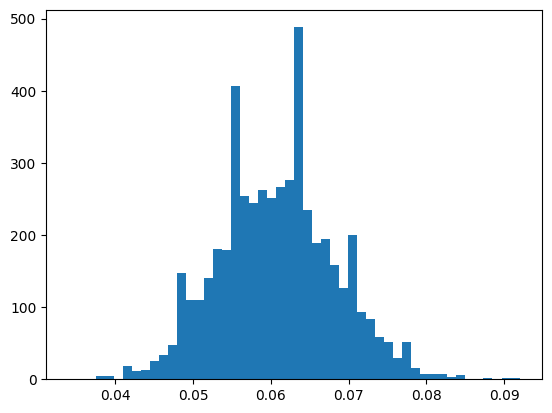

In [14]:
import matplotlib.pyplot as plt
plt.hist(late_shipments_boot_distn, bins=50)
plt.show()

In [15]:
# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == "Yes").mean()

# Print the results
print("late_prop_samp =",late_prop_samp)

# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof = 1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Print z_score
print("z_score =",z_score)

late_prop_samp = 0.061
z_score = 0.13291411707457765


#### **Calculating p-values**


In [16]:
from scipy.stats import norm

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print("z_score =",z_score)
print("p_value =",p_value)

z_score = 0.13291411707457765
p_value = 0.44713065107692573


#### **Statistical significance $\alpha$ - Decisions from `p-values`**


By comparing the `p-value` to the `significance level` $\alpha$, you can make a decision about which hypothesis to support.

- The p-value is a measure of evidence against the `null` hypothesis.
The null hypothesis ($H_0$) assumes no significant difference or relationship between variables.

- The `alternative hypothesis` ($H_1$) suggests a significant difference or relationship.

- A `significance level` ($\alpha$) is chosen as the threshold for decision-making.

- Calculate the `p-value`, which represents the probability of obtaining the observed data or more extreme if the `null` hypothesis is true.

- If the `p-value` ≤ `alpha`, typically `0.05` or `0.01`, you reject the `null` hypothesis.

- Rejecting the `null` hypothesis indicates evidence in support of the `alternative` hypothesis.

- If the `p-value` > `alpha`, you `fail` to reject the `null` hypothesis.
Failing to reject the null hypothesis means there is insufficient evidence to support the alternative hypothesis.

- The decision should be interpreted in the context of the study and practical implications.


#### **Calculating a confidence interval**


In [17]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.047, 0.076)


#### **Type I and type II errors**

In hypothesis testing, `Type I` and `Type II` errors are two types of mistakes that can occur when making conclusions about a population based on sample data. Let's understand each type of error with an example and provide code snippets to demonstrate them.

- **Type I Error (`False Positive`):**
    - A `Type I` error occurs **when you reject a null hypothesis that is actually true**. In other words, you conclude that there is a significant effect or difference when, in reality, there is none. The probability of committing a `Type I` error is denoted by the `significance level` (usually denoted as alpha, α).

        - `Example`: Suppose you are testing a new drug's effectiveness to treat a specific disease.     The `null` hypothesis (`H0`) states that the drug has no effect, while the  `alternative` hypothesis (`Ha`) states that the drug is effective. A `Type I` error    would occur if you reject the null hypothesis and conclude that the drug is    effective, even though it has no actual effect.

- **`Type II` Error (False Negative):**
    - A `Type II` error occurs when you fail to reject a null hypothesis that is actually false. In other words, you conclude that there is no significant effect or difference when, in reality, there is one. The probability of committing a Type II error is denoted by beta (β).

        - `Example`:Continuing with the previous example, let's say the drug is indeed effective, but you fail to reject the null hypothesis and conclude that it has no effect.

In [18]:
import numpy as np
from scipy import stats

# Generating a sample dataset
np.random.seed(0)
population_mean = 100  # True population mean
population_std = 15  # True population standard deviation
sample_size = 100  # Sample size
sample_data = np.random.normal(population_mean, population_std, sample_size)

# Setting up null and alternative hypotheses
null_hypothesis_mean = 95  # Null hypothesis: population mean is 95
alternative_hypothesis_mean = 105  # Alternative hypothesis: population mean is 105

# Setting significance level (alpha)
alpha = 0.05

# Performing a one-sample t-test for Type 1 error
t_statistic, p_value = stats.ttest_1samp(sample_data, null_hypothesis_mean)
type_1_error = p_value if t_statistic > 0 else 1 - p_value

# Performing a one-sample t-test for Type 2 error
t_statistic, p_value = stats.ttest_1samp(sample_data, alternative_hypothesis_mean)
type_2_error = p_value if t_statistic < 0 else 1 - p_value

print("Type 1 error:", type_1_error)
print("Type 2 error:", type_2_error)

Type 1 error: 0.00018756560539117116
Type 2 error: 0.008150276399454719


# **2️⃣Two-Sample and ANOVA Tests**

## **Performing `t-tests`**


#### **Hypothesis testing workflow**



- Identify population parameter that is hypothesized about.

- Specify the null and alternative hypotheses.

- Determine (standardized) test statistic and corresponding null distribution.

- Conduct hypothesis test in Python.

- Measure evidence against the null hypothesis.

- Make a decision comparing evidence to significance level.

- Interpret the results in the context of the original problem.

`two-sample` `t-test` using the `scipy.stats` module in Python

In [19]:
import numpy as np
import scipy.stats as stats

# Generate random data for two samples
np.random.seed(0)
sample1 = np.random.normal(loc=5, scale=2, size=100)  # Sample 1 with mean 5 and standard deviation 2
sample2 = np.random.normal(loc=7, scale=2, size=100)  # Sample 2 with mean 7 and standard deviation 2

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

# Print the results
print("Two-Sample T-Test:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Two-Sample T-Test:
T-Statistic: -7.04142736901327
P-Value: 3.059820094514085e-11


In [20]:
import numpy as np
import scipy.stats as stats

# Two-Sample t-test
def two_sample_ttest(sample1, sample2):
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)
    return t_statistic, p_value

# ANOVA Test
def anova_test(*samples):
    f_statistic, p_value = stats.f_oneway(*samples)
    return f_statistic, p_value

# Hypothesis Testing Workflow
def hypothesis_testing_workflow():
    # Step 1: Define null and alternative hypotheses
    null_hypothesis = "The means of the two samples are equal."
    alternative_hypothesis = "The means of the two samples are not equal."

    # Step 2: Collect and preprocess data
    sample1 = [1, 2, 3, 4, 5]  # Sample 1 data
    sample2 = [3, 4, 5, 6, 7]  # Sample 2 data

    # Step 3: Choose a significance level (e.g., alpha = 0.05)

    # Step 4: Perform the two-sample t-test
    t_statistic, p_value = two_sample_ttest(sample1, sample2)

    # Step 5: Perform ANOVA test
    f_statistic, p_value_anova = anova_test(sample1, sample2)

    # Step 6: Make a decision based on p-value and significance level
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis for the t-test. The means of the two samples are not equal.")
    else:
        print("Fail to reject the null hypothesis for the t-test. The means of the two samples may be equal.")

    if p_value_anova < alpha:
        print("Reject the null hypothesis for the ANOVA test. The means of the two samples are not equal.")
    else:
        print("Fail to reject the null hypothesis for the ANOVA test. The means of the two samples may be equal.")

    # Step 7: Calculate and interpret the test statistics
    print("The calculated t-statistic is:", t_statistic)
    print("The calculated f-statistic for ANOVA is:", f_statistic)

    # Step 8: Calculate and print sample means
    print("Sample 1 mean:", np.mean(sample1))
    print("Sample 2 mean:", np.mean(sample2))

# Example usage:
hypothesis_testing_workflow()

Fail to reject the null hypothesis for the t-test. The means of the two samples may be equal.
Fail to reject the null hypothesis for the ANOVA test. The means of the two samples may be equal.
The calculated t-statistic is: -2.0
The calculated f-statistic for ANOVA is: 4.0
Sample 1 mean: 3.0
Sample 2 mean: 5.0


In [21]:
import numpy as np
from scipy.stats import t

# Sample data
mean_group1 = 5.6  # Sample mean for the first group
mean_group2 = 6.3  # Sample mean for the second group
std_group1 = 1.2  # Sample standard deviation for the first group
std_group2 = 1.5  # Sample standard deviation for the second group
size_group1 = 30  # Sample size for the first group
size_group2 = 25  # Sample size for the second group

# Calculate the degrees of freedom
df = size_group1 + size_group2 - 2

# Calculate the pooled standard deviation
sp = np.sqrt(((size_group1 - 1) * std_group1 ** 2 + (size_group2 - 1) * std_group2 ** 2) / df)

# Calculate the standard error of the difference between means
se = sp * np.sqrt(1 / size_group1 + 1 / size_group2)

# Calculate the t-statistic
t_statistic = (mean_group1 - mean_group2) / se

# Calculate the critical value for a given significance level (e.g., 0.05 for 95% confidence)
alpha = 0.05
critical_value = t.ppf(1 - alpha / 2, df)

# Compare the t-statistic with the critical value and make a decision
if t_statistic < -critical_value or t_statistic > critical_value:
    decision = "Reject the null hypothesis"
else:
    decision = "Fail to reject the null hypothesis"

# Print the results
print("t-statistic:", t_statistic)
print("Critical value:", critical_value)
print("Decision:", decision)

t-statistic: -1.923061587474125
Critical value: 2.0057459935369497
Decision: Fail to reject the null hypothesis


#### **Two sample mean test statistic**

The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in above section 1. It's called `t`, and it can be calculated from three values from each sample using this equation.

$$t=\frac{(\bar{x}_{child} - \bar{x}_{adult})}
{\sqrt{\frac{s^2_{child}}{n_{child}}   + \frac{s^2_{adult}}{n_{aduilt}} }}$$

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late.

To perform the hypothesis test for the difference between the means of two populations, you need the following information:

- Sample mean for the "yes" group: `xbar_yes`
- Sample mean for the "no" group: `xbar_no`
- Sample standard deviation for the "yes" group: `s_yes`
- Sample standard deviation for the "no" group: `s_no`
- Sample size for the "yes" group: `n_yes`
- Sample size for the "no" group: `n_no`

In [22]:
late_shipments['late']

0      Yes
1       No
2       No
3       No
4       No
      ... 
995     No
996     No
997    Yes
998     No
999     No
Name: late, Length: 1000, dtype: object

In [23]:
import numpy as np

# Filter the DataFrame for the "yes" group
late_yes_group = late_shipments[late_shipments['late'] == 'Yes']

# Filter the DataFrame for the "no" group
late_no_group = late_shipments[late_shipments['late'] == 'No']

# Calculate sample means
xbar_yes = late_yes_group['weight_kilograms'].mean()
xbar_no = late_no_group['weight_kilograms'].mean()

# Calculate sample standard deviations
s_yes = late_yes_group['weight_kilograms'].std(ddof=1) # "ddof" stands for "delta degrees of freedom."
s_no = late_no_group['weight_kilograms'].std(ddof=1)

# Calculate sample sizes
n_yes = late_yes_group.shape[0]
n_no = late_no_group.shape[0]

# Calculate the numerator of the test statistic
numerator = xbar_yes - xbar_no

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no**2 / n_no + s_yes**2 / n_yes)

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print("t_stat =", t_stat)


t_stat = 2.3936661778766433


## **Calculating `p-values` from `t-statistics`**


The `t-distribution` is used in hypothesis testing when the population standard deviation is unknown and needs to be estimated from the sample data, particularly when the sample size is small.

It accounts for the uncertainty introduced by estimating the standard deviation from the sample, resulting in fatter tails compared to the `z-distribution`. When the sample size is large, the `t-distribution` approximates the z-distribution. In summary, the `t-distribution` is needed when the population standard deviation is unknown and needs to be estimated, especially with small sample sizes.

The **t-distribution** is used to calculate the `p-value` from the test statistic, and having a sense of how the PDF and CDF look can help you understand this calculation. It has two parameters: the degrees of freedom, and the non-centrality parameter.

The plots show the PDF and CDF for a t-distribution (solid black line), and for comparison show a standard normal distribution with mean 0 and variance 1 (gray dotted line).

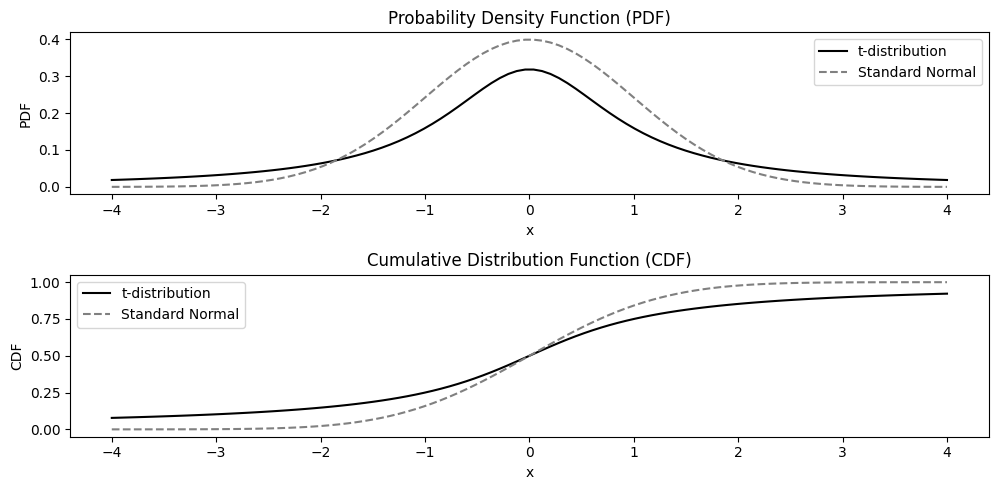

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Parameters
degrees_of_freedom = 1

# Create the x-axis values
x = np.linspace(-4, 4, 100)

# Calculate the PDF and CDF for t-distribution
t_pdf = t.pdf(x, df=degrees_of_freedom)
t_cdf = t.cdf(x, df=degrees_of_freedom)

# Calculate the PDF and CDF for standard normal distribution
normal_pdf = norm.pdf(x)
normal_cdf = norm.cdf(x)

# Plot
plt.figure(figsize=(10, 5))

# Plot the PDFs
plt.subplot(2, 1, 1)
plt.plot(x, t_pdf, 'k', label='t-distribution')
plt.plot(x, normal_pdf, 'gray', linestyle='--', label='Standard Normal')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Probability Density Function (PDF)')
plt.legend()

# Plot the CDFs
plt.subplot(2, 1, 2)
plt.plot(x, t_cdf, 'k', label='t-distribution')
plt.plot(x, normal_cdf, 'gray', linestyle='--', label='Standard Normal')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

As you increase the `degrees of freedom` from `1` to `10`, the `t-distribution` `PDF` and `CDF` curves get closer to those of a `normal distribution`.

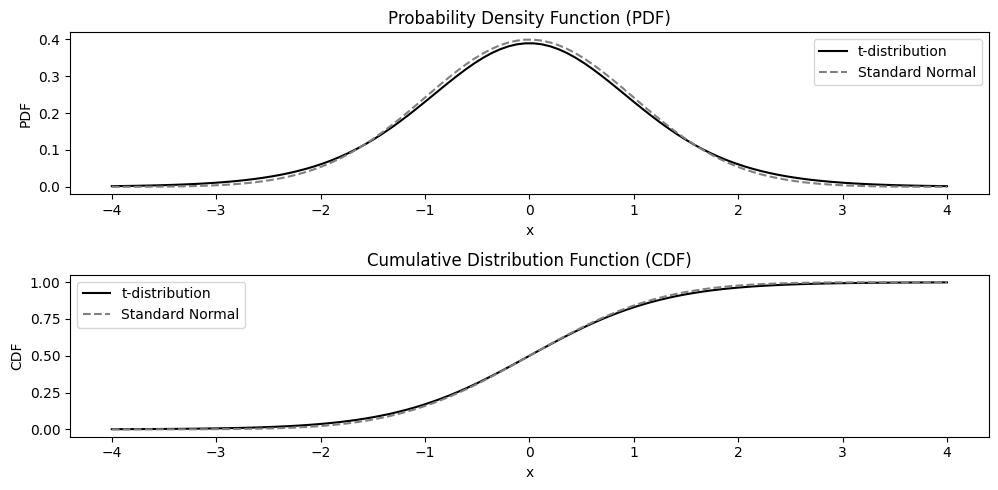

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Parameters
degrees_of_freedom = 10

# Create the x-axis values
x = np.linspace(-4, 4, 100)

# Calculate the PDF and CDF for t-distribution
t_pdf = t.pdf(x, df=degrees_of_freedom)
t_cdf = t.cdf(x, df=degrees_of_freedom)

# Calculate the PDF and CDF for standard normal distribution
normal_pdf = norm.pdf(x)
normal_cdf = norm.cdf(x)

# Plot
plt.figure(figsize=(10, 5))

# Plot the PDFs
plt.subplot(2, 1, 1)
plt.plot(x, t_pdf, 'k', label='t-distribution')
plt.plot(x, normal_pdf, 'gray', linestyle='--', label='Standard Normal')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Probability Density Function (PDF)')
plt.legend()

# Plot the CDFs
plt.subplot(2, 1, 2)
plt.plot(x, t_cdf, 'k', label='t-distribution')
plt.plot(x, normal_cdf, 'gray', linestyle='--', label='Standard Normal')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### **From `t` to `p`**


In [26]:
import numpy as np
from scipy.stats import t

# Parameters
alpha = 0.05  # Significance level
group1_data = np.array([1, 2, 3, 4, 5])  # Data of group 1
group2_data = np.array([2, 4, 6, 8, 10])  # Data of group 2

# Calculate the sample means
mean1 = np.mean(group1_data)
mean2 = np.mean(group2_data)

# Calculate the sample standard deviations
std1 = np.std(group1_data, ddof=1)
std2 = np.std(group2_data, ddof=1)

# Calculate the sample sizes
n1 = len(group1_data)
n2 = len(group2_data)

# Calculate the pooled standard deviation
pooled_std = np.sqrt(((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / (n1 + n2 - 2))

# Calculate the test statistic
t_stat = (mean1 - mean2) / (pooled_std * np.sqrt(1 / n1 + 1 / n2))

# Calculate the degrees of freedom
degrees_of_freedom = n1 + n2 - 2

# Calculate the p-value
p_value = 1 - t.cdf(t_stat, df=degrees_of_freedom)

# Print the calculated values
print("Test Statistic:", t_stat)
print("Degrees of Freedom:", degrees_of_freedom)
print("p-value:", p_value)

Test Statistic: -1.8973665961010275
Degrees of Freedom: 8
p-value: 0.9528251135787812


## **Paired `t-tests`**


#### **Is pairing needed?**

pairing is needed in a hypothesis test when the observations in the two groups are related or matched. If the observations are independent and not related, pairing is not necessary. The decision to use a paired or independent t-test depends on the experimental design and the relationship between the observations in the groups.


In [27]:
import numpy as np
from scipy.stats import ttest_ind # Independent t-test

# Data for Group 1
group1 = np.array([5, 7, 9, 11, 13])

# Data for Group 2
group2 = np.array([8, 9, 10, 11, 12])

# Perform independent t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Print the results
print("Independent t-test")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Independent t-test
T-Statistic: -0.6324555320336759
P-Value: 0.544737300804491


In [28]:
import numpy as np
from scipy.stats import ttest_rel # Paired t-test

# Blood pressure measurements before treatment
before_treatment = [120, 130, 140, 125, 135, 130, 122, 138, 132, 127]

# Blood pressure measurements after treatment
after_treatment = [115, 125, 135, 118, 128, 123, 116, 133, 126, 121]

# Perform paired t-test
t_statistic, p_value = ttest_rel(before_treatment, after_treatment)

# Print the results
print("Paired t-test")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Paired t-test
T-Statistic: 21.30829599618115
P-Value: 5.1886608645111844e-09


| Feature                   | `ttest_ind` (Independent t-test)                  | `ttest_rel` (Paired t-test)                              |
|---------------------------|------------------------------------------------|----------------------------------------------------------|
| Purpose                   | Compare means of two independent groups        | Compare means of two related/paired groups               |
| Input                    | Two separate arrays/lists for each group       | Two arrays/lists with paired observations                |
| Assumption                | Observations in each group are independent     | Observations in each pair are dependent/related          |
| Null Hypothesis           | The means of the two groups are equal          | The means of the two groups are equal                    |
| Alternative Hypothesis    | The means of the two groups are not equal      | The means of the two groups are not equal                |
| Statistical Test          | Two-sample t-test (unpaired)                   | One-sample t-test (paired)                               |
| Degrees of Freedom        | Calculated based on the sample sizes          | Calculated based on the number of pairs                  |
| Test Statistic            | Independent t-statistic                        | Paired t-statistic                                       |
| Calculation of p-value    | Uses the t-distribution                         | Uses the t-distribution                                  |
| Example Scenario          | Comparing the effect of a drug on two groups   | Comparing the effect of a training program on pre/post measurements |
| Python Function           | `ttest_ind(group_a, group_b)`                  | `ttest_rel(before_treatment, after_treatment)`           |


#### **Visualizing the difference**


,state,county,dem_percent_12,dem_percent_16,diff
0,Alabama,Bullock,76.305900,74.946921,1.358979
1,Alabama,Chilton,19.453671,15.847352,3.606319
2,Alabama,Clay,26.673672,18.674517,7.999155
3,Alabama,Cullman,14.661752,10.028252,4.633500
4,Alabama,Escambia,36.915731,31.020546,5.895185




Mean of the diff Column = 6.829312660106834 

standard deviation of the diff column = 5.040139140132317 



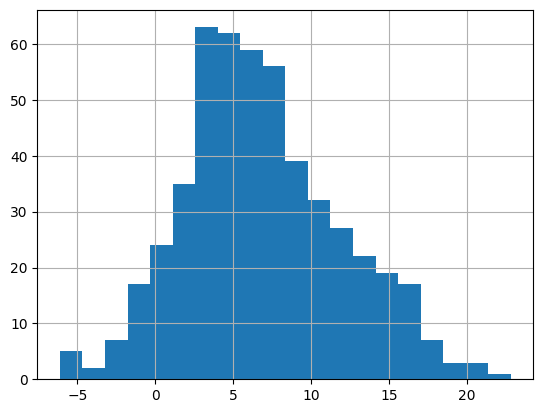

In [29]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Print sample_dem_data
display(sample_dem_data.head(5))
print("\n")

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print("Mean of the diff Column =",xbar_diff, "\n")

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print s_diff
print("standard deviation of the diff column =",s_diff, "\n")

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

#### **Using `ttest()`**

In [30]:
!pip install pingouin -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [31]:
import pingouin as pg

# Conduct a t-test on 'diff'
ttest_results = pg.ttest(sample_dem_data['diff'],
                         y=0,
                         alternative='two-sided')

# Print the t-test results
print("T-test results:")
display(ttest_results)
print("\n")

# Conduct a paired t-test on 'dem_percent_12' and 'dem_percent_16'
paired_ttest_results = pg.ttest(sample_dem_data['dem_percent_12'],
                                sample_dem_data['dem_percent_16'],
                                paired=True,
                                alternative='two-sided')

# Print the paired t-test results
print("Paired t-test results:")
display(paired_ttest_results)

T-test results:


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",1.354985,2.246e+111,1.0




Paired t-test results:


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


| **Aspect**         | **Paired t-test**                                         | **Unpaired t-test**                                   |
|--------------------|----------------------------------------------------------|------------------------------------------------------|
| Data               | Paired or matched observations                            | Independent and unrelated observations                |
| Purpose            | Compare means within the same subjects or entities        | Compare means between separate groups of subjects     |
| Assumption         | The differences between paired observations are normally distributed | The data in each group is normally distributed |
| Hypotheses         | Null hypothesis: No significant difference between the means of paired observations | Null hypothesis: No significant difference between the means of two independent groups |
| Test statistic     | t-statistic                                               | t-statistic                                           |
| Degrees of freedom | Based on the number of pairs (n-1)                        | Based on the sample sizes of the two groups (n1 + n2 - 2) |
| Calculation        | Mean of the differences between paired observations       | Difference in means between the two groups            |
| P-value interpretation | P-value indicates the probability of observing the observed difference (or more extreme) if the null hypothesis is true | P-value indicates the probability of observing the observed difference (or more extreme) if the null hypothesis is true |
| P-value significance | A small p-value (typically less than 0.05) suggests strong evidence against the null hypothesis, indicating a significant difference between the means | A small p-value (typically less than 0.05) suggests strong evidence against the null hypothesis, indicating a significant difference between the means |


## **`ANOVA` tests**


In [32]:
import scipy.stats as stats

# Heights of plants in each treatment group
treatment_A = [10, 12, 14, 11, 9, 13, 10, 12, 11, 14, 9, 10, 12, 13, 11, 10, 12, 11, 13, 14]
treatment_B = [15, 17, 16, 14, 18, 15, 16, 17, 16, 15, 16, 17, 14, 15, 16, 17, 15, 16, 15, 17]
treatment_C = [20, 22, 23, 21, 19, 20, 22, 21, 22, 23, 21, 19, 20, 22, 21, 20, 19, 20, 21, 23]

# Perform one-way ANOVA
statistic, p_value = stats.f_oneway(treatment_A, treatment_B, treatment_C)

# Print the results
print("One-way ANOVA results:")
print("F-statistic:", statistic)
print("p-value:", p_value)

# Chosen significance level (α)
alpha = 0.05

# Degrees of freedom
df_between = 2  # Number of treatment groups - 1
df_within = 57  # Total number of observations - Number of treatment groups

# Calculate the critical value
critical_value = stats.f.ppf(1 - alpha, df_between, df_within)

# Determine if the null hypothesis is rejected
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

# Calculate the confidence interval
mean_values = [np.mean(treatment_A), np.mean(treatment_B), np.mean(treatment_C)]
overall_mean = np.mean(mean_values)
group_sizes = [len(treatment_A), len(treatment_B), len(treatment_C)]
mean_square_within = np.mean([np.var(treatment_A), np.var(treatment_B), np.var(treatment_C)])

margin_of_error = critical_value * np.sqrt(mean_square_within / np.sum(group_sizes))

confidence_interval = (overall_mean - margin_of_error, overall_mean + margin_of_error)
print("Confidence Interval:", confidence_interval)

One-way ANOVA results:
F-statistic: 241.6792723791287
p-value: 1.4487575739598525e-28
Reject the null hypothesis.
Confidence Interval: (15.578606335709518, 16.654726997623808)


#### **Visualizing many categories** - **Conducting an ANOVA test**


The grouped means shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64


The grouped standard deviations shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64




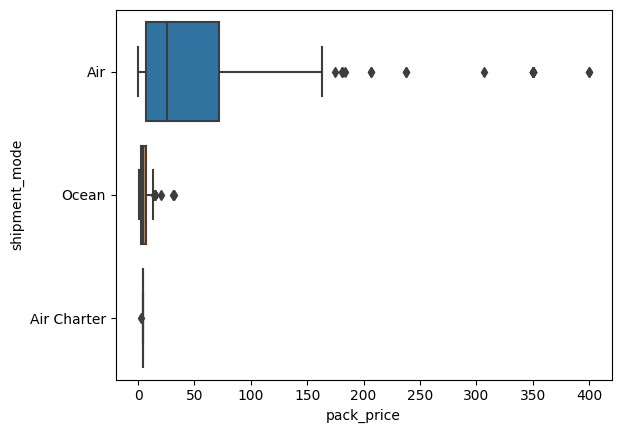

In [33]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Print the grouped means
print("The grouped means", xbar_pack_by_mode)
print("\n")

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped standard deviations
print("The grouped standard deviations",s_pack_by_mode)
print("\n")


# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x="pack_price", y="shipment_mode", data=late_shipments)
plt.show()

In [34]:
import pingouin as pg

# Run an ANOVA for pack_price across shipment_mode
anova_results = pg.anova(data=late_shipments,
                        dv="pack_price",
                        between="shipment_mode")

# Print anova_results
display(anova_results)

,Source,ddof1,ddof2,F,p-unc,np2
0,shipment_mode,2,997,21.8646,5.089479e-10,0.042018


**Assuming a significance level of `0.1`, should you reject the null hypothesis that there is no difference in pack prices between shipment modes?**


>`Yes`! The p-value is less than or equal to the significance level, so the null hypothesis should be rejected.


#### **Pairwise t-tests**

In [35]:
import pingouin as pg

# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pg.pairwise_tests(data= late_shipments,
                                            dv = 'pack_price',
                                            between = 'shipment_mode')

# Print pairwise_results
display(pairwise_results)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,15.277,-0.423775


In [36]:
import pingouin as pg

# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pg.pairwise_tests(data=late_shipments,
                                     dv="pack_price",
                                     between="shipment_mode",
                                     padjust="none")

# Print pairwise_results
display(pairwise_results)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,15.277,-0.423775


# **📉Pingouin**

[**Pingouin**](https://pingouin-stats.org/build/html/index.html) is an open-source statistical package written in Python 3 and based mostly on Pandas and NumPy. Some of its main features are listed below:


- ANOVAs: N-ways, repeated measures, mixed, ancova
- Pairwise post-hocs tests (parametric and non-parametric) and pairwise correlations
- Robust, partial, distance and repeated measures correlations
- `Linear/logistic` regression and mediation analysis
- `Bayes` Factors
- Multivariate tests
- Reliability and consistency
- Effect sizes and power analysis
- `Parametric/bootstrapped` confidence intervals around an effect size or a correlation coefficient
- Circular statistics
- `Chi-squared` tests
- Plotting: Bland-Altman plot, `Q-Q plot`, `paired plot`, `robust correlation`.

In [37]:
import pingouin as pg

# Generate some sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Perform a t-test
t_result = pg.ttest(x, y)

# Print the result
print(t_result)


               T  dof alternative    p-val          CI95%  cohen-d   BF10  \
T-test -1.897367    8   two-sided  0.09435  [-6.65, 0.65]      1.2  1.286   

           power  
T-test  0.386437  


In [38]:
import pingouin as pg
import pandas as pd

# Create a pandas DataFrame with the data
data = pd.DataFrame({'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
                     'Value': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

# Perform one-way ANOVA
anova_result = pg.anova(data=data, dv='Value', between='Group')

# Print the result
print(anova_result)

  Source  ddof1  ddof2     F  p-unc  np2
0  Group      2      6  27.0  0.001  0.9


In [39]:
import pingouin as pg
import pandas as pd

# Create a pandas DataFrame with the data
data = pd.DataFrame({'Group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
                     'Value': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

# Perform pairwise t-tests
pairwise_ttests_result = pg.pairwise_tests(data=data, dv='Value', between='Group')

# Print the result
display(pairwise_ttests_result)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Group,A,B,False,True,-3.674235,4.0,two-sided,0.021312,3.235,-2.4
1,Group,A,C,False,True,-7.348469,4.0,two-sided,0.001826,15.154,-4.8
2,Group,B,C,False,True,-3.674235,4.0,two-sided,0.021312,3.235,-2.4


# **3️⃣Proportion Tests**

## **One-sample proportion tests**


#### **Test for single proportions**


$$ z = \frac{\hat{p} - p_0}
{\sqrt{\frac{p_0 * (1-p_0)}
{n}}}
$$


- $z$: The test statistic, which measures how many standard deviations the sample proportion ($\hat{p}$) is away from the hypothesized proportion ($p_0$).

- $\hat{p}$: The sample proportion of a specific characteristic or event of interest. In this case, it represents the proportion of late shipments in the sample.

- $p_0$: The hypothesized proportion of the characteristic or event of interest. It represents the proportion of late shipments assumed under the null hypothesis.

- $n$: The sample size, which refers to the number of observations in the sample.

- $(1 - p_0)$: Represents the probability of not observing the characteristic or event of interest (e.g., no late shipments) under the null hypothesis.

- $p_0 * (1 - p_0)$: The variance of a binomial distribution, which describes the distribution of proportions.

- $\frac{p_0 * (1-p_0)}{n}$: The standard error of the sample proportion, which measures the variability of the sample proportion estimate.


In [40]:
late_shipments = pd.read_feather(url_shipments)

In [41]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == 'Yes').mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

0.061 1000


**Z-score**

In [42]:
# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Print the result
print(z_score)

0.13315591032282698


**P-value**

In [43]:
# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


## **Two-sample proportion tests**


You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the late_shipments dataset, whether or not the shipment was late is stored in the late column. Freight costs are stored in the freight_cost_group column, and the categories are "expensive" and "reasonable".

The hypotheses to test, with "late" corresponding to the proportion of late shipments for that group, are

$ H_0: late_{expensive} - late_{reasonable} = 0$


$ H_A: late_{expensive} - late_{reasonable} > 0$

p_hats contains the estimates of population proportions (sample proportions) for the "expensive" and "reasonable" groups. ns contains the sample sizes for these groups. p_hats and ns have been printed for you.

pandas and numpy have been imported under their usual aliases, and norm is available from scipy.stats.


**Instructions**


- Calculate the pooled sample proportion, $\hat{p}$, from p_hats and ns.

$$ \hat{p} = \frac{n_{expensive} \times \hat{p}_{expensive} + n_{reasonable} \times \hat{p}_{reasonable}}{n_{expensive} + n
_{reasonable}}$$


- Calculate the standard error of the sample using this equation.

$$SE(\hat{p}_{expensive} - \hat{p}_{reasonable}) = \sqrt{\frac{\hat{p}\times(1-\hat{p})}{n_{expensive}} + \frac{\hat{p}\times(1-\hat{p})}{n_{reasonable}}}
$$

- Calculate the pooled sample proportion times one minus the pooled sample proportion.


- Divide p_hat_times_not_p_hat by the sample sizes and sum those two values.


- Calculate the square root of p_hat_times_not_p_hat_over_ns.


- Calculate the z-score using the following equation.


$$ z = \frac{(\hat{p}_{expensive} - \hat{p}_{reasonable})}{SE(\hat{p}_{expensive} - \hat{p}_{reasonable})}
$$


- Calculate the p-value from the z-score.

In [44]:
late_shipments = pd.read_feather(url_shipments)
late_shipments.columns

Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

In [45]:
import numpy as np
from scipy.stats import norm

# Define the sample proportions and sizes
p_hats = {
    "reasonable": 0.6,
    "expensive": 0.8
}

ns = {
    "reasonable": 100,
    "expensive": 150
}

# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)

0.00027995312400308503


#### **`proportions_ztest()` for two samples**


In [46]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

# Print the counts
print(late_by_freight_cost_group)

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: late, dtype: int64


## **Chi-square test of independence**


#### **The `chi-square` distribution**


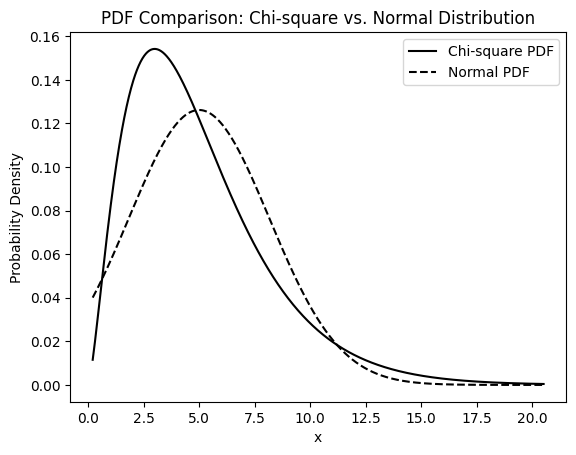

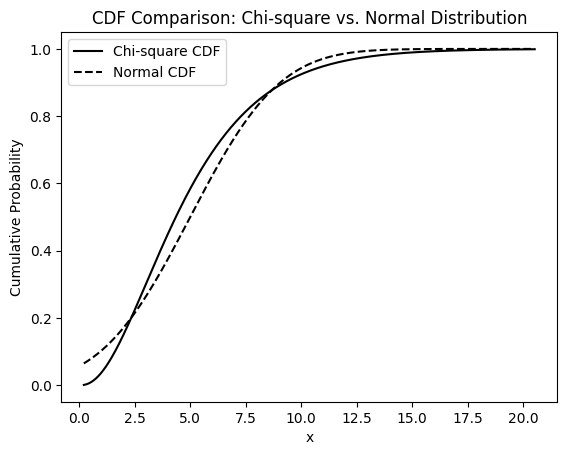

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

# Set the degrees of freedom for the chi-square distribution
df = 5

# Calculate the mean and variance of the chi-square distribution
mean_chi2 = df
var_chi2 = 2 * df

# Create a normal distribution with the same mean and variance
mean_norm = mean_chi2
var_norm = var_chi2
std_norm = np.sqrt(var_norm)

# Generate x values for the plot
x = np.linspace(chi2.ppf(0.001, df), chi2.ppf(0.999, df), 1000)

# Calculate the PDF and CDF of the chi-square distribution
pdf_chi2 = chi2.pdf(x, df)
cdf_chi2 = chi2.cdf(x, df)

# Calculate the PDF and CDF of the normal distribution
pdf_norm = norm.pdf(x, mean_norm, std_norm)
cdf_norm = norm.cdf(x, mean_norm, std_norm)

# Plot the PDFs
plt.figure()
plt.plot(x, pdf_chi2, 'k-', label='Chi-square PDF')
plt.plot(x, pdf_norm, 'k--', label='Normal PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.title('PDF Comparison: Chi-square vs. Normal Distribution')

# Plot the CDFs
plt.figure()
plt.plot(x, cdf_chi2, 'k-', label='Chi-square CDF')
plt.plot(x, cdf_norm, 'k--', label='Normal CDF')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.title('CDF Comparison: Chi-square vs. Normal Distribution')

# Show the plots
plt.show()

#### **How many tails for `chi-square` tests?**


Unlike `pingouin.ttest()` and `statsmodels.stats.proportion.proportions_ztest()`, `pingouin.chi2_independence()` does not have an alternative argument to specify which tails are considered by the alternative hypothesis.

**Which tail is almost always considered in chi-square tests?**


#### Answer the question

✅ $Right-tailed$



#### **Performing a `chi-square` test**


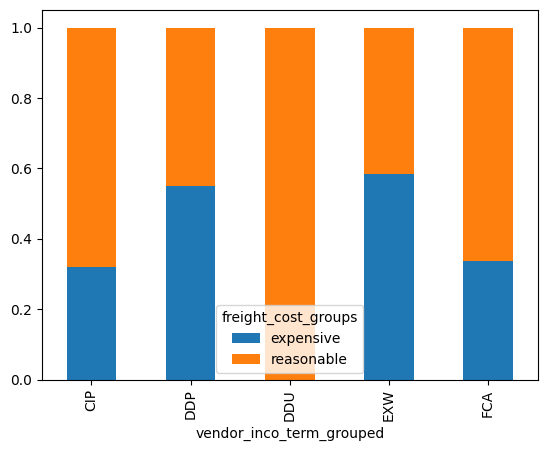

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


In [48]:
import warnings
import pingouin as pg
import matplotlib.pyplot as plt

# Group categories to avoid low counts
late_shipments['vendor_inco_term_grouped'] = late_shipments['vendor_inco_term']
late_shipments.loc[late_shipments['vendor_inco_term_grouped'].isin(['category1', 'category2']), 'vendor_inco_term_grouped'] = 'Other'

# Proportion of freight_cost_group grouped by vendor_inco_term_grouped
props = late_shipments.groupby('vendor_inco_term_grouped')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term_grouped
wide_props.plot(kind="bar", stacked=True)
plt.show()

# Disable warnings temporarily
warnings.filterwarnings("ignore")

# Determine if freight_cost_group and vendor_inco_term_grouped are independent
expected, observed, stats = pg.chi2_independence(data=late_shipments, x="vendor_inco_term_grouped", y="freight_cost_groups")

# Print results
print(stats[stats['test'] == 'pearson'])

# Enable warnings again
warnings.filterwarnings("default")

## **Chi-square goodness of fit tests**


In [49]:
late_shipments = pd.read_feather(url_shipments)
late_shipments.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

#### **Visualizing goodness of fit**


In [50]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Print n_total
print(n_total)

1000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
import pandas as pd

# Define the hypothesized DataFrame
hypothesized = pd.DataFrame({
    "incoterms": ["CIP", "DDP", "EXW", "FCA"],
    "prop": [0.05, 0.1, 0.75, 0.1]
})

# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Print the modified hypothesized DataFrame
print(hypothesized)


  incoterms  prop      n
0       CIP  0.05   50.0
1       DDP  0.10  100.0
2       EXW  0.75  750.0
3       FCA  0.10  100.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


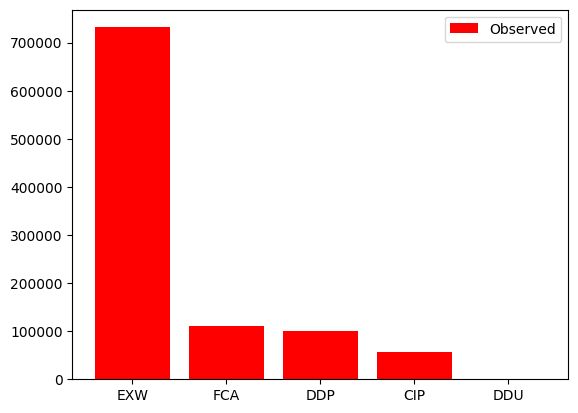

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Find the value counts of vendor_inco_term column and store in incoterm_counts
incoterm_counts = late_shipments['vendor_inco_term'].value_counts().reset_index()

# Rename the columns in incoterm_counts
incoterm_counts.columns = ['vendor_inco_term', 'count']

# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is count column * n_total
incoterm_counts["n"] = incoterm_counts["count"] * n_total

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")
plt.legend()
plt.show()


#### **Performing a goodness of fit test**

In [53]:
from scipy.stats import chisquare

# Observed frequencies
observed = [45, 55, 60, 40]

# Expected frequencies (null hypothesis)
expected = [50, 50, 50, 50]

# Perform chi-square test
chi2, p_value = chisquare(f_obs=observed, f_exp=expected)

# Print chi-square test results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 5.0
p-value: 0.1717971442967335


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **4️⃣Non-Parametric Tests**

## **Assumptions in hypothesis testing**


#### **Common assumptions of hypothesis tests**


Hypothesis tests make assumptions about the dataset that they are testing, and the conclusions you draw from the test results are only valid if those assumptions hold. While some assumptions differ between types of test, others are common to all hypothesis tests.

**Which of the following statements is a common assumption of hypothesis tests?**

>✅ Sample observations have no direct releationship with each other.


All hypothesis tests assume that the data are collected at random from the population, that each row is independent of the others, and that the sample size is "big enough"


#### **Testing sample size**


In [54]:
late_shipments = pd.read_feather(url_shipments)
late_shipments.columns

Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

In [55]:
# Count the freight_cost_group values
counts = late_shipments['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())


# Count the late values
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())


# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby(['vendor_inco_term'])['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())


# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

expensive     531
reasonable    455
Name: freight_cost_groups, dtype: int64
True
No     939
Yes     61
Name: late, dtype: int64
True
vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64
False
Air            906
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **`Non-parametric` tests**


#### **Which parametric test?**

Which test is a parametric equivalent to the `Wilcoxon signed-rank` test?

- z-test for a difference in proportions ❌


- Chi-square goodness of fit test ❌


- Paired t-test  ✅


- ANOVA ❌



#### **`Wilcoxon` signed-rank test**


In [56]:
import pingouin as pg

# Suppress deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results =  pg.ttest(x= sample_dem_data['dem_percent_12'],
                                     y= sample_dem_data['dem_percent_16'],
                                     paired= True,
                                     alternative= 'greater')




# Print paired t-test results
display(paired_test_results)


# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pg.wilcoxon(x = sample_dem_data['dem_percent_12'],
                                          y = sample_dem_data['dem_percent_16'],
                                          alternative = 'greater')


# Print Wilcoxon test results
display(wilcoxon_test_results)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,greater,1.800317e-115,"[6.46, inf]",0.454202,4.491e+111,1.0


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,122849.0,greater,8.901980e-78,0.961661,0.644816


## **Non-parametric `ANOVA` and unpaired `t-tests`**


#### **`Wilcoxon-Mann-Whitney`**

Another class of non-parametric hypothesis tests are called rank sum tests. Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.

One common rank-based test is the Wilcoxon-Mann-Whitney test, which is like a non-parametric t-test.


In [57]:
# Choose the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms', 'late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns = 'late', values = 'weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pg.mwu(x= weight_vs_late_wide['No'], y= weight_vs_late_wide['Yes'], alternative = 'two-sided')

# Print the test results
display(wmw_test)

,U-val,alternative,p-val,RBC,CLES
MWU,19134.0,two-sided,0.000014,0.331902,0.334049


#### **`Kruskal-Wallis`**

Recall that the Kruskal-Wallis test is a non-parametric version of an ANOVA test, comparing the means across multiple groups.


In [58]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pg.kruskal(data = late_shipments, dv= 'weight_kilograms', between = 'freight_cost_groups')

# Print the results
print(kw_test)

                      Source  ddof1           H         p-unc
Kruskal  freight_cost_groups      1  428.607103  3.266278e-95


## **Congratulations!**

#### $\color{skyblue}{\textbf{Connect with me:}}$


[<img align="left" src="https://cdn4.iconfinder.com/data/icons/social-media-icons-the-circle-set/48/twitter_circle-512.png" width="32px"/>][twitter]
[<img align="left" src="https://cdn-icons-png.flaticon.com/512/145/145807.png" width="32px"/>][linkedin]
[<img align="left" src="https://cdn2.iconfinder.com/data/icons/whcompare-blue-green-web-hosting-1/425/cdn-512.png" width="32px"/>][Portfolio]

[twitter]: https://twitter.com/F4izy
[linkedin]: https://www.linkedin.com/in/mohd-faizy/
[Portfolio]: https://mohdfaizy.com/
